<a href="https://colab.research.google.com/github/GabaAraujo/Python_IA/blob/main/Deep%20Leaning%20Classifica%C3%A7%C3%A3o%20de%20Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)
# Importando pacotes necessários
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
# Carrega conjunto de dados

2.13.0


In [ ]:
dados = pd.read_csv('/content/Hypertensao_Treinamento.txt')
dados.head() # Ver dados Carregados

,Idade,Sexo,Tipo Sanguinio,Fator RH,Colesterol,HDL,Triglicerídeos,Creatinina,Peso (Kg),Altura (cm),Glicemia,Gamma GT,Sódio/Potássio,Classe A+ até F-
0,54,Masculino,A,+,95.2352,438.27,2.468254,149.728732,66,178,32,2.000264,9.1208,A+
1,65,Masculino,A,-,95.9146,444.10,4.318468,371.786259,46,142,46,1.000219,0.8231,C-
2,48,Masculino,B,+,72.0488,735.26,3.592467,792.534537,78,169,166,0.800336,1.5197,D+
3,83,Feminino,O,+,43.9004,892.30,6.606650,941.055245,41,168,76,1.600633,9.6174,B+
4,16,Masculino,B,-,83.8091,95.50,0.912195,448.457138,52,187,29,1.600361,2.4490,B+


In [ ]:
def ajustaTabela(table): #ajusta a tabela para dados numericos
 for i in range(len(table)):
    if table.iloc[i,1] == 'Masculino':
        table.iloc[i,1] = 1
    if table.iloc[i,1] == 'Feminino':
        table.iloc[i,1] = 0

    if table.iloc[i,2] == 'A':
        table.iloc[i,2] = 1
    if table.iloc[i,2] == 'B':
        table.iloc[i,2] = 2
    if table.iloc[i,2] == 'AB':
        table.iloc[i,2] = 3
    if table.iloc[i,2] == 'O':
        table.iloc[i,2] = 4

    if table.iloc[i,3] == '+':
        table.iloc[i,3] = 1
    if table.iloc[i,3] == '-':
        table.iloc[i,3] = 0


In [ ]:
# Divide em Entrada e Resposta
X = dados.iloc[:,0:13] # Entrada
scaler = StandardScaler() # Normaliza dos Dados

# passar por todas as colunas e transforma 'masculino' em 1 e 'feminino' em 0
ajustaTabela(X)

X.head()

,Idade,Sexo,Tipo Sanguinio,Fator RH,Colesterol,HDL,Triglicerídeos,Creatinina,Peso (Kg),Altura (cm),Glicemia,Gamma GT,Sódio/Potássio
0,54,1,1,1,95.2352,438.27,2.468254,149.728732,66,178,32,2.000264,9.1208
1,65,1,1,0,95.9146,444.10,4.318468,371.786259,46,142,46,1.000219,0.8231
2,48,1,2,1,72.0488,735.26,3.592467,792.534537,78,169,166,0.800336,1.5197
3,83,0,4,1,43.9004,892.30,6.606650,941.055245,41,168,76,1.600633,9.6174
4,16,1,2,0,83.8091,95.50,0.912195,448.457138,52,187,29,1.600361,2.4490


In [ ]:
def ajustaTabelaResultado(table):
  for i in range(len(table)):
    if table.iloc[i] == 'A+':
        table.iloc[i] = 1
    if table.iloc[i] == 'A-':
        table.iloc[i] = 2
    if table.iloc[i] == 'B+':
        table.iloc[i] = 3
    if table.iloc[i] == 'B-':
        table.iloc[i] = 4
    if table.iloc[i] == 'C+':
        table.iloc[i] = 5
    if table.iloc[i] == 'C-':
        table.iloc[i] = 6
    if table.iloc[i] == 'D+':
        table.iloc[i] = 7
    if table.iloc[i] == 'D-':
        table.iloc[i] = 8
    if table.iloc[i] == 'E+':
        table.iloc[i] = 9
    if table.iloc[i] == 'E-':
        table.iloc[i] = 10


In [ ]:

X = scaler.fit_transform(X)
X # Ver as entradas Normalizadas
Y1 = dados.iloc[:,13] # Resposta
Y1.head()



0    A+
1    C-
2    D+
3    B+
4    B+
Name: Classe A+ até F-, dtype: object

In [ ]:
ajustaTabelaResultado(Y1)

Y1.head()

0    1
1    6
2    7
3    3
4    3
Name: Classe A+ até F-, dtype: object

In [ ]:
# Transforma os dados
Y2 = []

for i in range(len(Y1)):
  linha = []
  for j in range(10):
    if (j+1) == Y1[i]:
      linha += [1]
    else:
      linha += [0]
  Y2.append(linha)
Y = pd.DataFrame(data=Y2,columns=['A+', 'A-', 'B+', 'B-', 'C+', 'C-', 'D+', 'D-', 'E+', 'E-'])

Y.head()

,A+,A-,B+,B-,C+,C-,D+,D-,E+,E-
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [ ]:

modelo = Sequential()
modelo.add(Dense(13, input_dim=13, activation='relu'))
modelo.add(Dense(10, activation='sigmoid'))

# Compila o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Treina o Modelo
resultado = modelo.fit(X, Y, batch_size = 400, epochs = 2000)

modelo.summary() # Mostra a rede

Epoch 1/2000
3/3 [==============================] - 1s 11ms/step - loss: 0.7003 - accuracy: 0.1267
Epoch 2/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.1256
Epoch 3/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.1267
Epoch 4/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.6759 - accuracy: 0.1267
Epoch 5/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.6682 - accuracy: 0.1300
Epoch 6/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.6605 - accuracy: 0.1322
Epoch 7/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.6530 - accuracy: 0.1322
Epoch 8/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.6457 - accuracy: 0.1322
Epoch 9/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.6385 - accuracy: 0.1333
Epoch 10/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.6315 - accuracy: 0.1367
Epoch 11/2000
3/3 

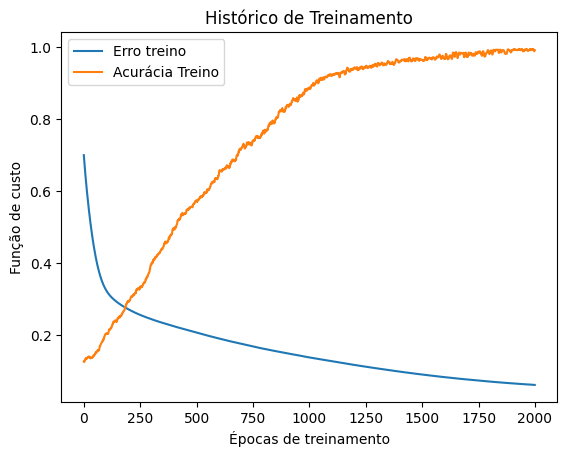

In [ ]:
# Mostra Resultado
import matplotlib.pyplot as plt
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['accuracy'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Acurácia Treino'])
plt.show()

In [ ]:

# Carrega conjunto de teste
testes = pd.read_csv('/content/Hypertensao_Teste.txt')
testes.head() # Ver testes

,Idade,Sexo,Tipo Sanguinio,Fator RH,Colesterol,HDL,Triglicerídeos,Creatinina,Peso (Kg),Altura (cm),Glicemia,Gamma GT,Sódio/Potássio
0,27,Feminino,AB,+,41.5768,852.58,0.892731,286.676766,64,164,61,2.000863,1.3113
1,64,Feminino,O,-,34.0087,385.61,5.207090,711.427331,41,151,67,2.000023,4.1241
2,85,Feminino,O,+,17.8986,773.54,5.591843,531.001899,86,181,4,2.000794,4.0406
3,80,Feminino,A,-,65.4376,725.19,0.403309,138.208942,42,163,162,1.800022,3.8163
4,90,Feminino,A,+,2.0596,670.06,2.778385,986.478842,45,183,113,1.800594,7.7449


In [ ]:

Xtestes = testes.iloc[:,0:13] # Entrada dos Testes
Xtestes # Ver os testes

ajustaTabela(Xtestes)

Xtestes = scaler.fit_transform(Xtestes) # Normaliza dos Testes
Xtestes


array([[-1.46693515, -0.93541435,  0.34099717,  1.        , -0.01688149,
         1.06237279, -1.2848903 , -0.82532386,  0.31375106, -0.01918557,
        -0.55131125,  1.56741921, -1.17296308],
       [ 0.12943545, -0.93541435,  1.36398868, -1.        , -0.28871108,
        -0.56254906,  0.37731268,  0.58352086, -1.21081395, -1.08809602,
        -0.44551592,  1.56595627, -0.13536247],
       [ 1.03548364, -0.93541435,  1.36398868,  1.        , -0.86735062,
         0.78733623,  0.52554735, -0.01492783,  1.77203063,  1.3786204 ,
        -1.55636695,  1.56729891, -0.16616439],
       [ 0.81975788, -0.93541435, -1.70498585, -1.        ,  0.84014623,
         0.61909208, -1.47345103, -1.31777313, -1.14452851, -0.10140945,
         1.22957691,  1.21775917, -0.24890537],
       [ 1.25120939, -0.93541435, -1.70498585,  1.        , -1.43625284,
         0.42725547, -0.55840006,  1.49583246, -0.94567221,  1.54306816,
         0.36558166,  1.21875501,  1.20029748],
       [-0.47459667, -0.935414

In [ ]:
# Mostra Pesos
for layerNum, layer in enumerate(modelo.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')
    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} \
                -> L{layerNum+1}N{toNeuronNum} = {wgt2}')

0B -> L1N0: 0.8270512819290161
0B -> L1N1: 1.0547173023223877
0B -> L1N2: 2.201070785522461
0B -> L1N3: 2.820167064666748
0B -> L1N4: 2.480095148086548
0B -> L1N5: -1.3514474630355835
0B -> L1N6: -0.6559275984764099
0B -> L1N7: 1.1755696535110474
0B -> L1N8: 3.6980016231536865
0B -> L1N9: 2.182910680770874
0B -> L1N10: 1.7045053243637085
0B -> L1N11: 3.5156054496765137
0B -> L1N12: 2.5927417278289795
L0N0                 -> L1N0 = 0.0060845534317195415
L0N0                 -> L1N1 = 0.622244119644165
L0N0                 -> L1N2 = 0.0177347119897604
L0N0                 -> L1N3 = -0.0030516774859279394
L0N0                 -> L1N4 = -0.015778256580233574
L0N0                 -> L1N5 = -0.009143567644059658
L0N0                 -> L1N6 = 0.010415060445666313
L0N0                 -> L1N7 = 0.4546784460544586
L0N0                 -> L1N8 = -0.3737123906612396
L0N0                 -> L1N9 = -0.0007929754792712629
L0N0                 -> L1N10 = -0.006593689788132906
L0N0                 ->

In [ ]:
# Mostra Pesos
for layerNum, layer in enumerate(modelo.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')
    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} \
                -> L{layerNum+1}N{toNeuronNum} = {wgt2}')

0B -> L1N0: 0.8270512819290161
0B -> L1N1: 1.0547173023223877
0B -> L1N2: 2.201070785522461
0B -> L1N3: 2.820167064666748
0B -> L1N4: 2.480095148086548
0B -> L1N5: -1.3514474630355835
0B -> L1N6: -0.6559275984764099
0B -> L1N7: 1.1755696535110474
0B -> L1N8: 3.6980016231536865
0B -> L1N9: 2.182910680770874
0B -> L1N10: 1.7045053243637085
0B -> L1N11: 3.5156054496765137
0B -> L1N12: 2.5927417278289795
L0N0                 -> L1N0 = 0.0060845534317195415
L0N0                 -> L1N1 = 0.622244119644165
L0N0                 -> L1N2 = 0.0177347119897604
L0N0                 -> L1N3 = -0.0030516774859279394
L0N0                 -> L1N4 = -0.015778256580233574
L0N0                 -> L1N5 = -0.009143567644059658
L0N0                 -> L1N6 = 0.010415060445666313
L0N0                 -> L1N7 = 0.4546784460544586
L0N0                 -> L1N8 = -0.3737123906612396
L0N0                 -> L1N9 = -0.0007929754792712629
L0N0                 -> L1N10 = -0.006593689788132906
L0N0                 ->